In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 300)

In [2]:
# beer1=pd.read_csv('../data/raw/recipeData.csv')
# beerd=pd.read_csv('../data/processed/dummies.csv',index_col=0)
beere=pd.read_csv('../data/processed/encoder.csv',index_col=0)
beere.head() #color=SRM

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,Style_code
0,Vanilla Cream Ale,Cream Ale,45,5.48,17.65,4.83,Pale Lager/Blonde Ale,2
2,Zombie Dust Clone - EXTRACT,American IPA,7,5.91,59.25,8.98,Pale Ale,1
3,Zombie Dust Clone - ALL GRAIN,American IPA,7,5.80,54.48,8.50,Pale Ale,1
4,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,6.48,17.84,4.57,Pale Lager/Blonde Ale,2
5,Sierra Nevada Pale Ale Clone,American Pale Ale,10,5.58,40.12,8.00,Pale Ale,1


In [3]:
beere=beere.drop(columns='Style_code')

In [4]:
style_map = {
    "Wheat": 0,
    "Pale Lager/Blonde Ale": 1,
    "Pale Ale": 2,
    "Strong Ale": 3,
    "Brown Ale": 4,
    "Stout/Porter":5
}

beere['Style_code'] = beere['Simple_style'].map(style_map)
beere.head()

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,Style_code
0,Vanilla Cream Ale,Cream Ale,45,5.48,17.65,4.83,Pale Lager/Blonde Ale,1
2,Zombie Dust Clone - EXTRACT,American IPA,7,5.91,59.25,8.98,Pale Ale,2
3,Zombie Dust Clone - ALL GRAIN,American IPA,7,5.80,54.48,8.50,Pale Ale,2
4,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,6.48,17.84,4.57,Pale Lager/Blonde Ale,1
5,Sierra Nevada Pale Ale Clone,American Pale Ale,10,5.58,40.12,8.00,Pale Ale,2


In [5]:
beere_num=beere[['ABV', 'IBU', 'Color','Style_code']]

In [6]:
beere.describe(include='all')

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,Style_code
count,61065,61067,61067.000000,61067.000000,61067.000000,61067.000000,61067,61067.000000
unique,49044,81,NaN,NaN,NaN,NaN,6,NaN
top,Awesome Recipe,American IPA,NaN,NaN,NaN,NaN,Pale Ale,NaN
freq,1065,11940,NaN,NaN,NaN,NaN,32185,NaN
mean,NaN,NaN,52.134148,6.109960,46.082720,13.160316,NaN,2.224999
std,NaN,NaN,55.290377,1.759085,42.086061,12.212511,NaN,1.379765
min,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,7.000000,5.080000,24.670000,5.070000,NaN,2.000000
50%,NaN,NaN,22.000000,5.770000,37.060000,7.940000,NaN,2.000000
75%,NaN,NaN,92.000000,6.790000,58.170000,15.570000,NaN,2.000000


In [7]:
beere.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61067 entries, 0 to 73860
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          61065 non-null  object 
 1   Style         61067 non-null  object 
 2   StyleID       61067 non-null  int64  
 3   ABV           61067 non-null  float64
 4   IBU           61067 non-null  float64
 5   Color         61067 non-null  float64
 6   Simple_style  61067 non-null  object 
 7   Style_code    61067 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.2+ MB


<Axes: >

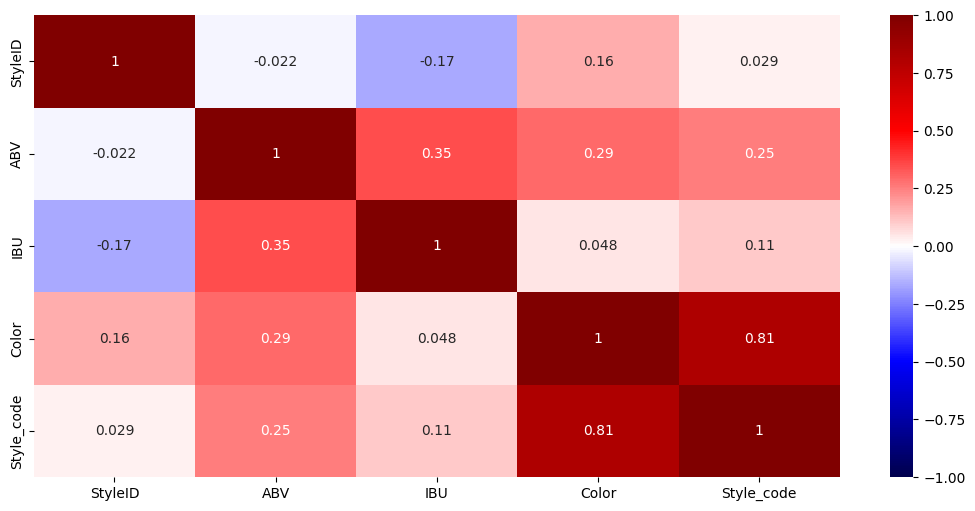

In [8]:
#pearson
plt.figure(figsize=(13,6))
sns.heatmap(beere.corr(method='pearson',numeric_only=True),cmap='seismic',annot=True,vmin=-1)

<Axes: >

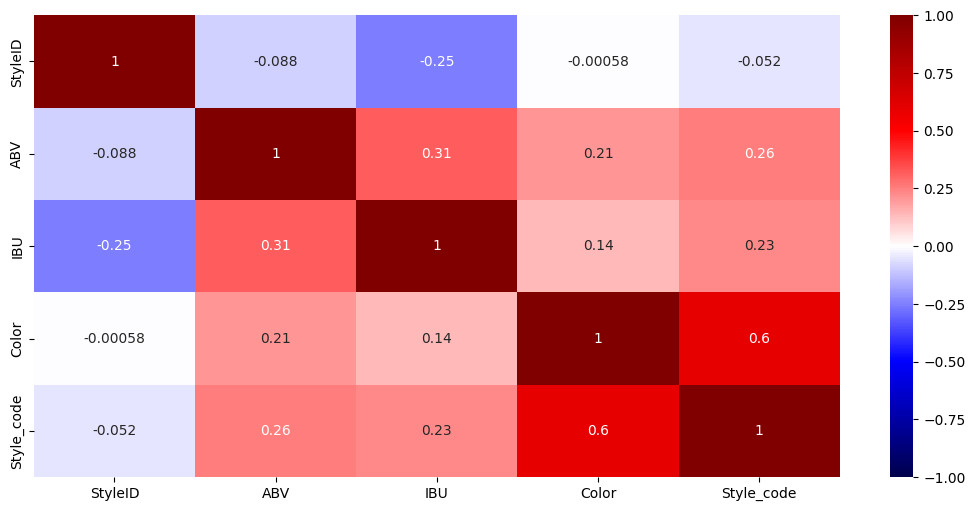

In [9]:
#kendall
plt.figure(figsize=(13,6))
sns.heatmap(beere.corr(method='kendall',numeric_only=True),cmap='seismic',annot=True,vmin=-1)

In [12]:
beere.columns

Index(['Name', 'Style', 'StyleID', 'ABV', 'IBU', 'Color', 'Simple_style',
       'Style_code'],
      dtype='object')

In [ ]:
# beer1['Style'][(beer1['Style'].str.contains('Ale'))].value_counts()

In [10]:
beere.groupby('Simple_style')[['ABV','IBU','Color']].mean().reset_index().sort_values(by='Simple_style')

,Simple_style,ABV,IBU,Color
0,Brown Ale,5.557610,32.840795,22.026572
1,Pale Ale,6.145972,56.813696,8.885258
2,Pale Lager/Blonde Ale,5.355674,28.256937,6.593596
3,Stout/Porter,6.710816,45.830329,37.396301
4,Strong Ale,8.438271,44.968502,17.570953
5,Wheat,5.140961,18.462859,4.790211


<Axes: xlabel='Simple_style', ylabel='Color'>

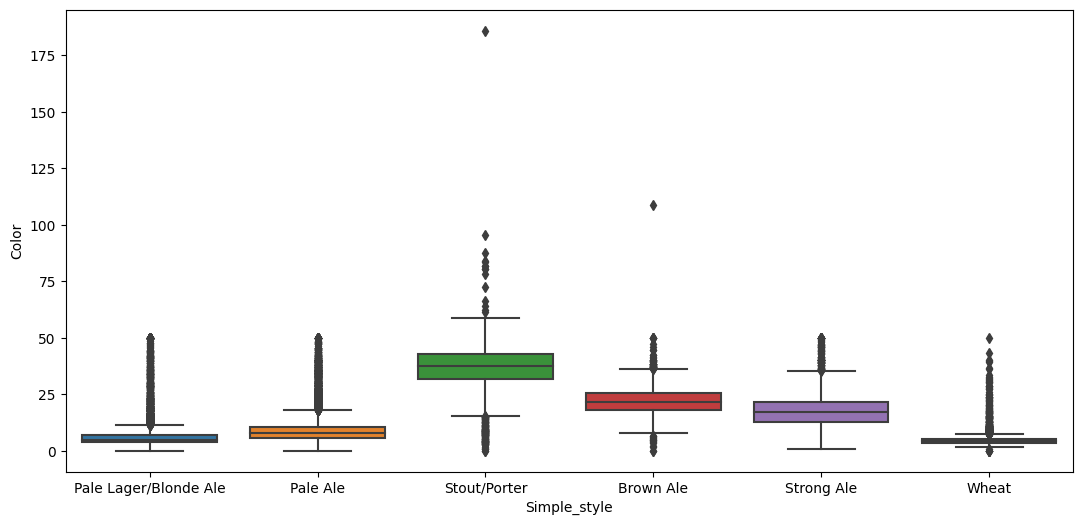

In [11]:
plt.figure(figsize=(13,6))
sns.boxplot(beere,y='Color',x='Simple_style')

(0.0, 1600.0)

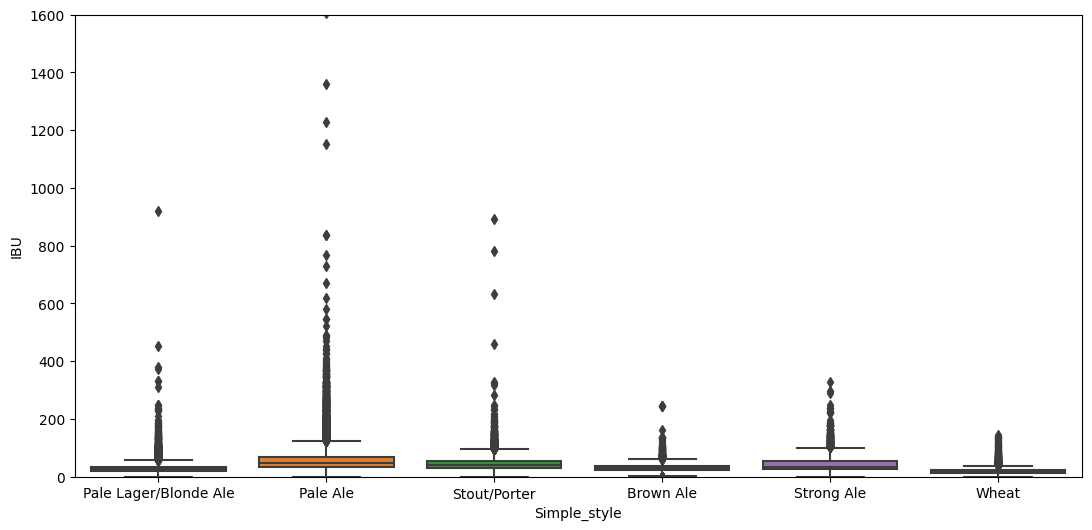

In [12]:
plt.figure(figsize=(13,6))
sns.boxplot(beere,y='IBU',x='Simple_style')
plt.ylim(0,1600)

<Axes: xlabel='Simple_style', ylabel='ABV'>

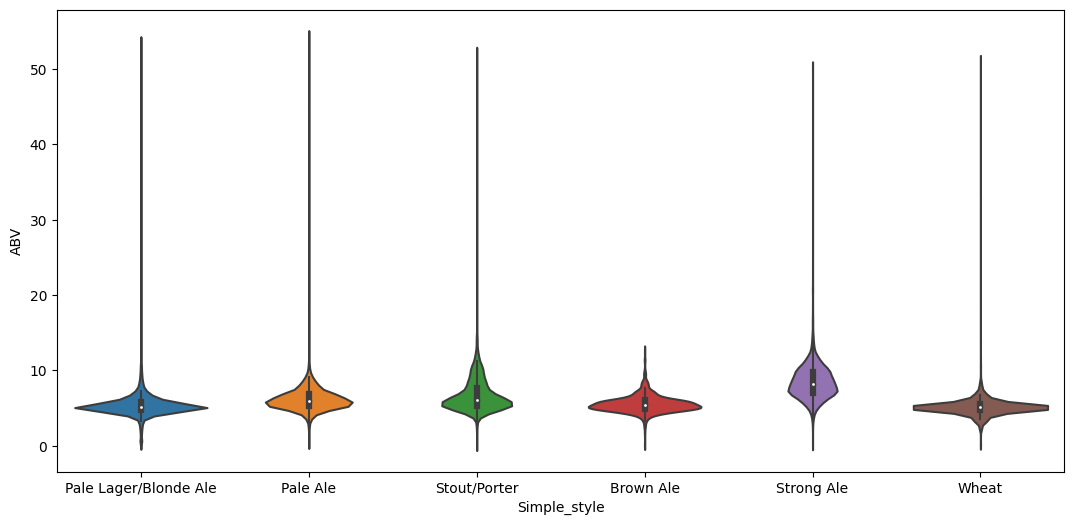

In [15]:
plt.figure(figsize=(13,6))
sns.violinplot(beere,y='ABV',x='Simple_style')

In [16]:
beerd_stats=beere.groupby(['Simple_style','Style_code'])[['ABV','IBU','Color',]].median().sort_values(by='Simple_style')
beerd_stats

,,ABV,IBU,Color
Simple_style,Style_code,,,
Brown Ale,4,5.42,29.08,21.36
Pale Ale,2,5.98,46.66,7.58
Pale Lager/Blonde Ale,1,5.17,24.88,4.62
Stout/Porter,5,6.10,38.89,37.65
Strong Ale,3,8.22,33.76,17.12
Wheat,0,5.09,16.24,4.05


### Let's check if the values in the DF match the 'definitions' from [Brewersfriend.com](https://www.brewersfriend.com/beer-charts/) and the limit values they stablish for each beer style.

#### Remove duplicated beers

In [17]:
beere=beere.drop_duplicates(subset='Name')

In [7]:
# beere.loc[beere['IBU'].idxmax()] #remove outlier
# beere = beere[beere['IBU'] != 3409.3]

In [79]:
beere['Simple_style'].value_counts()

Simple_style
Pale Ale                 25525
Stout/Porter              6584
Wheat                     3439
Pale Lager/Blonde Ale     3211
Strong Ale                2405
Brown Ale                 1544
Name: count, dtype: int64

In [55]:
# beere.loc[beere['ABV'].idxmin()]

Remove ABV outlier and missing values stored as zero

In [56]:
# beere.loc[beere['ABV'].idxmax()] #drop outlier

In [80]:
beere = beere[beere['ABV'] != 54.72]
beere = beere[(beere['ABV'] != 0.0) & (beere['IBU'] != 0.0) & (beere['Color'] != 0.0)]

In [83]:
beere.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42708 entries, 0 to 44858
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          42708 non-null  object 
 1   Style         42708 non-null  object 
 2   StyleID       42708 non-null  int64  
 3   ABV           42708 non-null  float64
 4   IBU           42708 non-null  float64
 5   Color         42708 non-null  float64
 6   Simple_style  42708 non-null  object 
 7   Style_code    42708 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 2.9+ MB


In [40]:
#Reset the index due to the dropped rows
beere.reset_index(drop=True, inplace=True)

In [70]:
beere.to_csv('../data/processed/beer_enc_limited.csv')

In [ ]:
#NXT NOTEBOOK
# X=beer1[['Size(L)', 'FG',
#        'ABV', 'IBU', 'Color', 'BoilTime', 'SugarScale', 'BrewMethod','PrimingMethod']]
# y=beer1['Simple_Style_code']

In [ ]:
#NXT NOTEBOOK
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42)

# X_resampled, y_resampled = rus.fit_resample(X, y)